In [1]:
# description       : Breast Cancer Wisconsin
# author            : raulsainz
# email             : 
# date              : 20210323
# version           : 0.1
#==============================================================================

In [1]:
#Import necesary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Setup pandas display parameters
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
pd.options.display.max_colwidth= 50
pd.options.display.precision = 3

In [3]:
cv_n_split = 3
random_state = 42
test_train_split_part = 0.2

# Dataset
## Data Set Information:
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<br>Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.
<br>

## Attribute Information:

1. ID number 
2. Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus: 

3. radius (mean of distances from center to points on the perimeter) 
4. texture (standard deviation of gray-scale values) 
5. perimeter 
6. area 
7. smoothness (local variation in radius lengths) 
8. compactness (perimeter^2 / area - 1.0) 
9. concavity (severity of concave portions of the contour) 
10. concave points (number of concave portions of the contour) 
11. symmetry 
12. fractal dimension ("coastline approximation" - 1)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/wisc_bc_data.csv')

In [5]:
df.shape

(569, 32)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


In [7]:
#Check data types on columns
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
#Check for null values on all columns
df.isnull().sum(axis = 0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#Check values at ciagnostics column
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
my_tab = pd.crosstab(index=df["diagnosis"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
diagnosis,
B,357
M,212


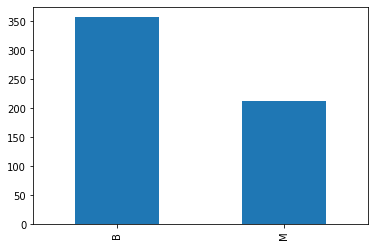

In [11]:
#Plot distribution of dignosis
df['diagnosis'].value_counts().plot(kind='bar')

In [12]:
#Set diagnosis as category
df['diagnosis'] = df['diagnosis'].astype('category')

In [13]:
#Drop column ID
df = df.drop(columns="id")

# feature Scaling
Normalization makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.

In [14]:
tbl = df.groupby(['diagnosis']).agg({
                                        'radius_mean':['max','min',np.mean],
                                        'area_mean':['max','min',np.mean],
                                        'smoothness_mean':['max','min',np.mean,'count']
                                    })
tbl.head()

radius_mean                 area_mean                  \
                  max     min    mean       max    min     mean   
diagnosis                                                         
B               17.85   6.981  12.147     992.1  143.5  462.790   
M               28.11  10.950  17.463    2501.0  361.6  978.376   

          smoothness_mean                      
                      max    min   mean count  
diagnosis                                      
B                   0.163  0.053  0.092   357  
M                   0.145  0.074  0.103   212

In [15]:
df[['radius_mean','area_mean','smoothness_mean']].describe()

,radius_mean,area_mean,smoothness_mean
count,569.000,569.000,569.000
mean,14.127,654.889,0.096
std,3.524,351.914,0.014
min,6.981,143.500,0.053
25%,11.700,420.300,0.086
50%,13.370,551.100,0.096
75%,15.780,782.700,0.105
max,28.110,2501.000,0.163


### Normalize using lambda

In [16]:
#Normalize data using lambda
df[['radius_mean','area_mean','smoothness_mean']].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))).describe(include='all')

,radius_mean,area_mean,smoothness_mean
count,569.000,569.000,569.000
mean,0.338,0.217,0.395
std,0.167,0.149,0.127
min,0.000,0.000,0.000
25%,0.223,0.117,0.305
50%,0.302,0.173,0.390
75%,0.416,0.271,0.475
max,1.000,1.000,1.000


In [17]:
df_normalized = df.iloc[:,1:].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df_normalized.describe(include='all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.338,0.324,0.333,0.217,0.395,0.261,0.208,0.243,0.380,0.270,0.106,0.189,0.099,0.063,0.181,0.174,0.081,0.223,0.178,0.100,0.297,0.364,0.283,0.171,0.404,0.220,0.217,0.394,0.263,0.190
std,0.167,0.145,0.168,0.149,0.127,0.162,0.187,0.193,0.138,0.149,0.100,0.122,0.095,0.085,0.102,0.134,0.076,0.117,0.116,0.091,0.172,0.164,0.167,0.140,0.151,0.153,0.167,0.226,0.122,0.118
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.223,0.218,0.217,0.117,0.305,0.140,0.069,0.101,0.282,0.163,0.044,0.105,0.040,0.021,0.117,0.081,0.038,0.145,0.102,0.047,0.181,0.241,0.168,0.081,0.300,0.116,0.091,0.223,0.185,0.108
50%,0.302,0.309,0.293,0.173,0.390,0.225,0.144,0.167,0.370,0.244,0.077,0.165,0.072,0.033,0.159,0.137,0.065,0.207,0.153,0.079,0.250,0.357,0.235,0.123,0.397,0.179,0.181,0.343,0.248,0.164
75%,0.416,0.409,0.417,0.271,0.475,0.341,0.306,0.368,0.453,0.340,0.133,0.246,0.123,0.072,0.219,0.227,0.106,0.279,0.219,0.127,0.386,0.472,0.373,0.221,0.494,0.303,0.306,0.555,0.318,0.243
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Normalize using sklearn

In [18]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df.iloc[:,1:])
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.338,0.324,0.333,0.217,0.395,0.261,0.208,0.243,0.380,0.270,0.106,0.189,0.099,0.063,0.181,0.174,0.081,0.223,0.178,0.100,0.297,0.364,0.283,0.171,0.404,0.220,0.217,0.394,0.263,0.190
std,0.167,0.145,0.168,0.149,0.127,0.162,0.187,0.193,0.138,0.149,0.100,0.122,0.095,0.085,0.102,0.134,0.076,0.117,0.116,0.091,0.172,0.164,0.167,0.140,0.151,0.153,0.167,0.226,0.122,0.118
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.223,0.218,0.217,0.117,0.305,0.140,0.069,0.101,0.282,0.163,0.044,0.105,0.040,0.021,0.117,0.081,0.038,0.145,0.102,0.047,0.181,0.241,0.168,0.081,0.300,0.116,0.091,0.223,0.185,0.108
50%,0.302,0.309,0.293,0.173,0.390,0.225,0.144,0.167,0.370,0.244,0.077,0.165,0.072,0.033,0.159,0.137,0.065,0.207,0.153,0.079,0.250,0.357,0.235,0.123,0.397,0.179,0.181,0.343,0.248,0.164
75%,0.416,0.409,0.417,0.271,0.475,0.341,0.306,0.368,0.453,0.340,0.133,0.246,0.123,0.072,0.219,0.227,0.106,0.279,0.219,0.127,0.386,0.472,0.373,0.221,0.494,0.303,0.306,0.555,0.318,0.243
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
y=df['diagnosis']
X = df_normalized

In [20]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [21]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.521,0.023,0.546,0.364,0.594,0.792,0.703,0.731,0.686,0.606,0.356,0.120,0.369,0.274,0.159,0.351,0.136,0.301,0.312,0.183,0.621,0.142,0.668,0.451,0.601,0.619,0.569,0.912,0.598,0.419
1,0.643,0.273,0.616,0.502,0.290,0.182,0.204,0.349,0.380,0.141,0.156,0.083,0.124,0.126,0.119,0.081,0.047,0.254,0.085,0.091,0.607,0.304,0.540,0.435,0.348,0.155,0.193,0.639,0.234,0.223
2,0.601,0.390,0.596,0.449,0.514,0.431,0.463,0.636,0.510,0.211,0.230,0.094,0.180,0.163,0.151,0.284,0.097,0.390,0.206,0.127,0.556,0.360,0.508,0.375,0.484,0.385,0.360,0.835,0.404,0.213
3,0.210,0.361,0.234,0.103,0.811,0.811,0.566,0.523,0.776,1.000,0.139,0.176,0.127,0.038,0.251,0.543,0.143,0.354,0.728,0.287,0.248,0.386,0.241,0.094,0.915,0.814,0.549,0.885,1.000,0.774
4,0.630,0.157,0.631,0.489,0.430,0.348,0.464,0.518,0.378,0.187,0.234,0.093,0.221,0.164,0.332,0.168,0.144,0.357,0.136,0.146,0.520,0.124,0.507,0.342,0.437,0.172,0.319,0.558,0.158,0.143


# generating the model

In [22]:
#Split the data
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state,test_size=test_train_split_part)

In [23]:
#Create first KNN model
knn = KNeighborsClassifier(n_neighbors=21)
knn = knn.fit(X_train,y_train)


In [24]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


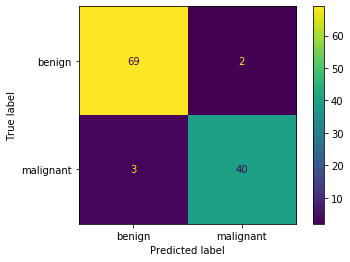

In [25]:
plot_confusion_matrix(knn,X_test,y_test, display_labels=['benign','malignant'])

In [26]:
# Iterare alphas and create  decision tree for each value of alpha
knn = KNeighborsClassifier()
folds = 5 #5 fold validation because sample is small
params_grid = {'n_neighbors': np.arange(1,30)}

knn_cv = GridSearchCV(knn,params_grid,cv=folds)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_train_split_part,random_state=random_state,stratify=y)
knn_cv.fit(X_train,y_train)
print('Best Params :',knn_cv.best_params_)
print('Best score :',knn_cv.best_score_)
y_preds = knn_cv.best_estimator_.predict(X_test)
print('Accuracy :',knn_cv.best_estimator_.score(X_test,y_test))
print('classification report')
print(classification_report(y_test,y_preds))

Best Params : {'n_neighbors': 7}
Best score : 0.9692307692307693
Accuracy : 0.956140350877193
classification report
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
best_neighbors = knn_cv.best_params_['n_neighbors']

## Final Model using best neighbor found

In [28]:
kdd_final = KNeighborsClassifier(n_neighbors = best_neighbors)
kdd_final = kdd_final.fit(X_train,y_train)

In [29]:
 #Predict the response for test dataset
y_pred = kdd_final.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


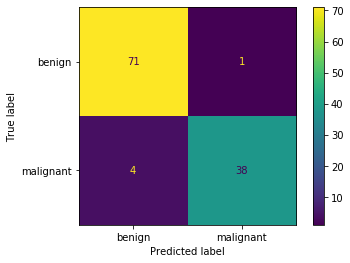

In [30]:
plot_confusion_matrix(kdd_final,X_test,y_test, display_labels=['benign','malignant'])

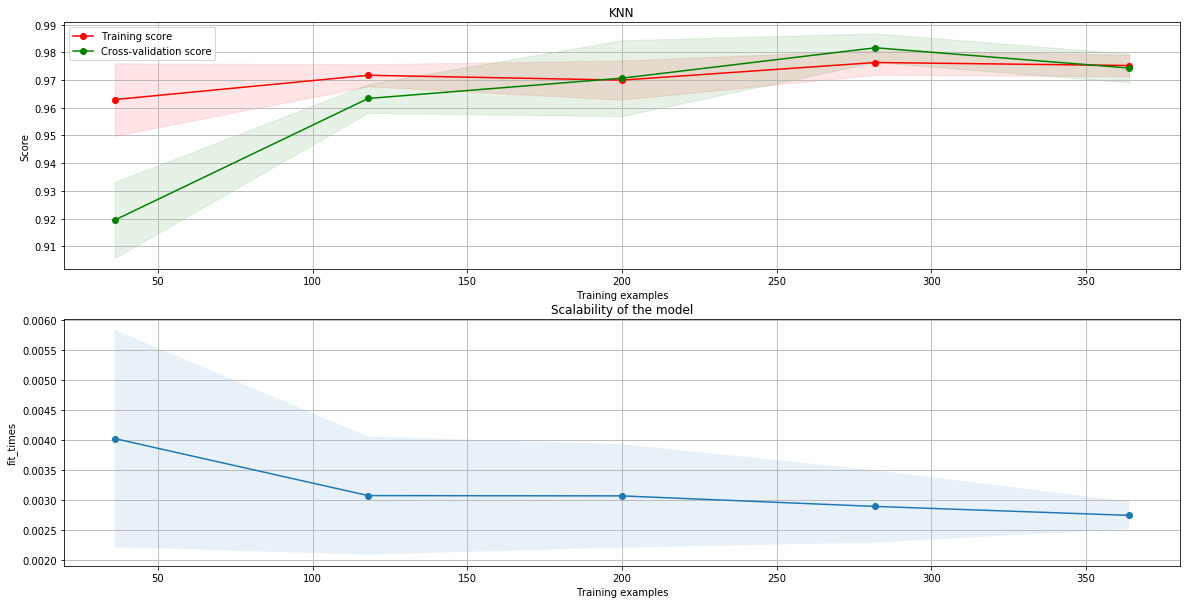

In [34]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
plot_learning_curve(knn, "KNN", X_train, y_train, cv=cv_train)

# Decision Tree

[Text(539.8359375, 385.05, 'X[22] <= 0.311\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = benign'),
 Text(417.046875, 339.75, 'X[27] <= 0.551\ngini = 0.137\nsamples = 297\nvalue = [275, 22]\nclass = benign'),
 Text(322.59375, 294.45, 'X[3] <= 0.234\ngini = 0.081\nsamples = 285\nvalue = [273, 12]\nclass = benign'),
 Text(249.9375, 249.15, 'X[24] <= 0.707\ngini = 0.056\nsamples = 279\nvalue = [271, 8]\nclass = benign'),
 Text(174.375, 203.85, 'X[22] <= 0.259\ngini = 0.036\nsamples = 274\nvalue = [269, 5]\nclass = benign'),
 Text(93.0, 158.55, 'X[13] <= 0.075\ngini = 0.016\nsamples = 247\nvalue = [245, 2]\nclass = benign'),
 Text(46.5, 113.25, 'X[21] <= 0.568\ngini = 0.008\nsamples = 243\nvalue = [242, 1]\nclass = benign'),
 Text(23.25, 67.94999999999999, 'gini = 0.0\nsamples = 229\nvalue = [229, 0]\nclass = benign'),
 Text(69.75, 67.94999999999999, 'X[1] <= 0.456\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = benign'),
 Text(46.5, 22.650000000000034, 'gini = 0.0\nsample

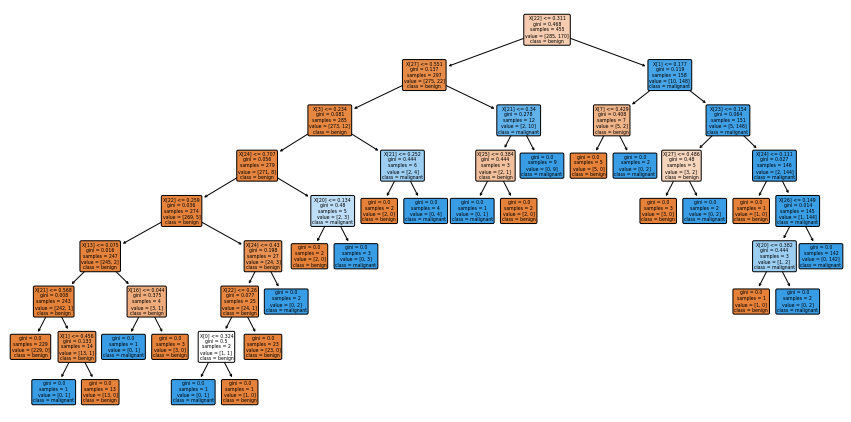

In [51]:
#First decision tree
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree  import plot_tree
clf_dt = DecisionTreeClassifier(random_state=random_state)
clf_dt = clf_dt.fit(X_train,y_train)
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['benign','malignant'])

In [52]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)

In [53]:
cpp_alphas = path.ccp_alphas #extract different values for alpha
cpp_alphas = cpp_alphas[:-1] #exclude the maximum value for alpha
decision_trees =[] #create array to save each tree info

In [54]:
decision_tree = DecisionTreeClassifier()
param_grid = {
                'min_samples_leaf': [i for i in range(2,10)],
                'ccp_alpha': cpp_alphas                
                }
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(X_train, y_train)
#print(decision_tree_CV.best_params_)

print('Best Params :',decision_tree_CV.best_params_)
print('Best score :',decision_tree_CV.best_score_)
y_preds = decision_tree_CV.best_estimator_.predict(X_test)
print('Accuracy :',decision_tree_CV.best_estimator_.score(X_test,y_test))
print('classification report')
print(classification_report(y_test,y_preds))

Best Params : {'ccp_alpha': 0.0, 'min_samples_leaf': 6}
Best score : 0.9413919413919415
Accuracy : 0.9122807017543859
classification report
              precision    recall  f1-score   support

           B       0.90      0.97      0.93        72
           M       0.94      0.81      0.87        42

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [58]:
cpp_alphas

array([0.        , 0.00210989, 0.00218001, 0.00218264, 0.0029304 ,
       0.00430549, 0.00431858, 0.0043956 , 0.00527473, 0.00527473,
       0.00586081, 0.00627943, 0.00730477, 0.00730484, 0.01050899,
       0.01364431, 0.03168777])

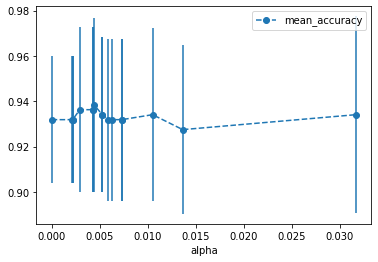

In [60]:
alpha_values = [] #create array to store different alpha values
folds = 5 #5 define number folds, select 5 because sample is small
for alpha in cpp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_state,ccp_alpha=alpha) #create tree with selected aplha    
    scores = cross_val_score(clf_dt,X_train,y_train,cv=folds) #Evaluate a score by cross-validation
    alpha_values.append([alpha,np.mean(scores),np.std(scores)]) #Add score values of alpha to array
alpha_results = pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std']) #store result on dataframe for ploting
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [61]:
alpha_results.sort_values(by=['mean_accuracy'], ascending=False)

,alpha,mean_accuracy,std
7,0.004,0.938,0.038
4,0.003,0.936,0.036
5,0.004,0.936,0.036
6,0.004,0.936,0.036
8,0.005,0.934,0.034
14,0.011,0.934,0.038
9,0.005,0.934,0.034
16,0.032,0.934,0.043
1,0.002,0.932,0.028
3,0.002,0.932,0.028


[Text(456.54545454545456, 366.93, 'X[22] <= 0.311\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = no HD'),
 Text(304.3636363636364, 285.39, 'X[27] <= 0.551\ngini = 0.137\nsamples = 297\nvalue = [275, 22]\nclass = no HD'),
 Text(228.27272727272728, 203.85000000000002, 'X[3] <= 0.234\ngini = 0.081\nsamples = 285\nvalue = [273, 12]\nclass = no HD'),
 Text(152.1818181818182, 122.31, 'X[24] <= 0.702\ngini = 0.056\nsamples = 279\nvalue = [271, 8]\nclass = no HD'),
 Text(76.0909090909091, 40.77000000000004, 'gini = 0.036\nsamples = 273\nvalue = [268, 5]\nclass = no HD'),
 Text(228.27272727272728, 40.77000000000004, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = no HD'),
 Text(304.3636363636364, 122.31, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = yes HD'),
 Text(380.4545454545455, 203.85000000000002, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = yes HD'),
 Text(608.7272727272727, 285.39, 'X[1] <= 0.177\ngini = 0.119\nsamples = 158\nvalue = [10, 148]\nclass = yes HD

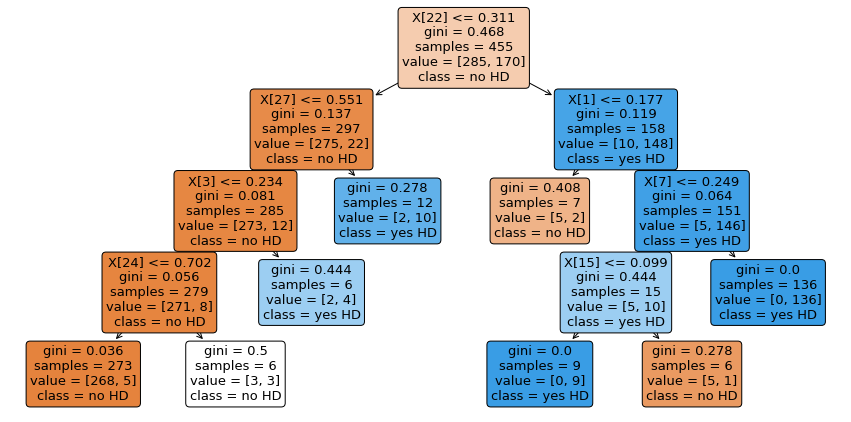

In [63]:
#First decision tree
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree  import plot_tree
clf_dt = DecisionTreeClassifier(random_state=random_state,ccp_alpha=0.004,min_samples_leaf=6)
clf_dt = clf_dt.fit(X_train,y_train)
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['no HD','yes HD'])

In [64]:
 #Predict the response for test dataset
y_pred = clf_dt.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9035087719298246


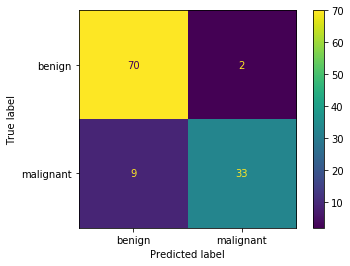

In [65]:
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=['benign','malignant'])

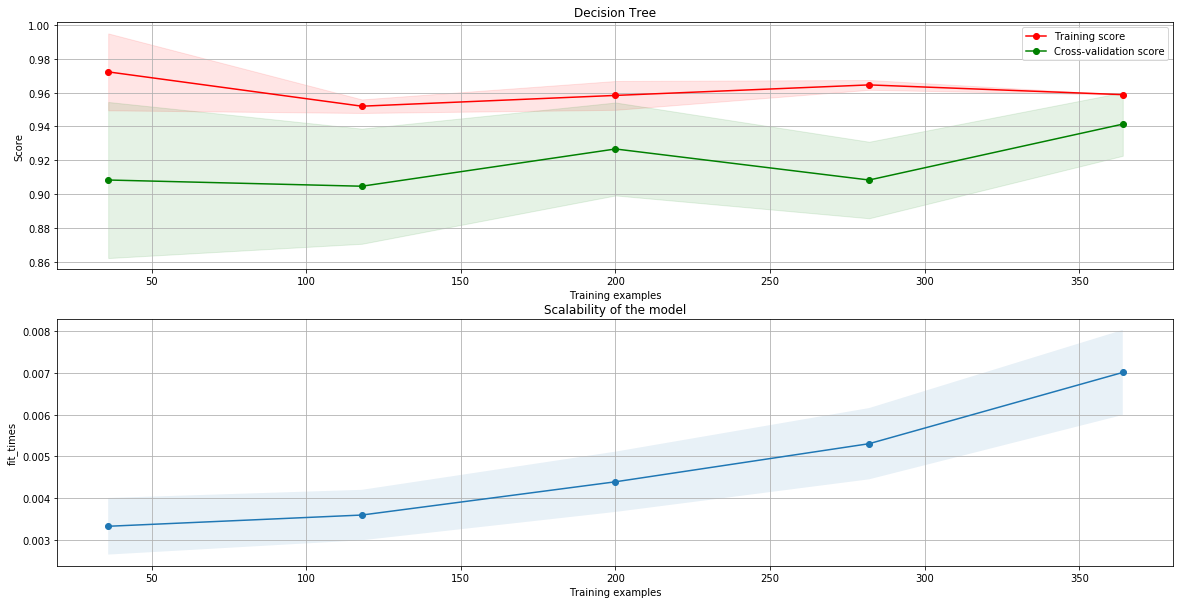

In [66]:
plot_learning_curve(clf_dt, "Decision Tree", X_train, y_train, cv=cv_train)

In [58]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [ ]:
plot_learning_curve(knn, "KNN", X_train, y_train, cv=cv_train)

In [32]:
# Thanks to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    """
    Generate 2 plots: 
    - the test and training learning curve, 
    - the training samples vs fit times curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    
    random_state : random_state
    
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

In [33]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    plot_cm(target, ytrain, target_test, ytest)